In [174]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.stats import pearsonr 

In [105]:
ril = pd.read_csv(r'C:\Users\91919\Desktop\icons\RELIANCE.NS.csv')
airtel = pd.read_csv(r'C:\Users\91919\Desktop\icons\BHARTIARTL.NS.csv')
indigo = pd.read_csv(r'C:\Users\91919\Desktop\icons\INDIGO.NS.csv')

In [106]:
ril.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-06,1361.900024,1361.900024,1321.099976,1327.349976,1320.108521,7664319
1,2019-06-07,1325.949951,1327.250000,1305.599976,1314.900024,1307.726440,6730595
2,2019-06-10,1320.900024,1327.000000,1310.099976,1319.150024,1311.953247,5380148
3,2019-06-11,1321.849976,1334.500000,1318.000000,1329.150024,1321.898682,5253790
4,2019-06-12,1334.699951,1338.400024,1325.000000,1332.150024,1324.882324,4707716


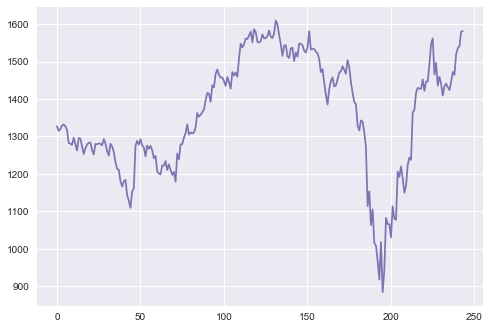

In [144]:
plt.plot(ril['Close'])
plt.show()

In [107]:
symbols=[]
ril['Symbol'] = 'RIL'
symbols.append(ril)
ril = ril[['Date', 'Close', 'Symbol']]
ril.head()

,Date,Close,Symbol
0,2019-06-06,1327.349976,RIL
1,2019-06-07,1314.900024,RIL
2,2019-06-10,1319.150024,RIL
3,2019-06-11,1329.150024,RIL
4,2019-06-12,1332.150024,RIL


In [108]:
airtel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-06,352.799988,355.950012,348.500000,353.799988,353.799988,10317108
1,2019-06-07,353.799988,361.950012,351.799988,357.100006,357.100006,5771494
2,2019-06-10,354.799988,364.649994,353.649994,363.450012,363.450012,5882086
3,2019-06-11,363.000000,366.950012,358.250000,363.250000,363.250000,5563691
4,2019-06-12,362.399994,362.399994,357.100006,359.899994,359.899994,2815172


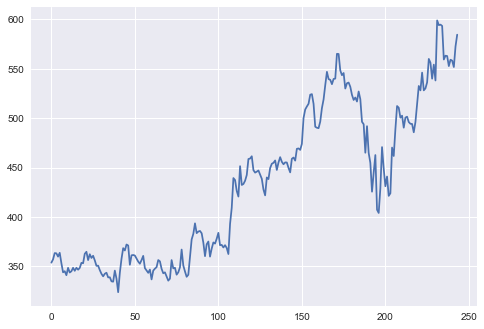

In [212]:
plt.plot(airtel['Close'])
plt.show()

In [109]:
symbols=[]
airtel['Symbol'] = 'ARTL'
symbols.append(airtel)
airtel = airtel[['Date', 'Close', 'Symbol']]
airtel.head()

,Date,Close,Symbol
0,2019-06-06,353.799988,ARTL
1,2019-06-07,357.100006,ARTL
2,2019-06-10,363.450012,ARTL
3,2019-06-11,363.250000,ARTL
4,2019-06-12,359.899994,ARTL


In [110]:
indigo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-06,1691.000000,1699.150024,1666.150024,1670.849976,1665.631592,829316
1,2019-06-07,1651.500000,1677.000000,1645.699951,1661.199951,1656.011597,956818
2,2019-06-10,1664.150024,1673.000000,1650.000000,1657.500000,1652.323242,659669
3,2019-06-11,1659.699951,1684.500000,1655.849976,1675.900024,1670.665771,898314
4,2019-06-12,1675.900024,1680.000000,1629.000000,1650.949951,1645.793701,1287297


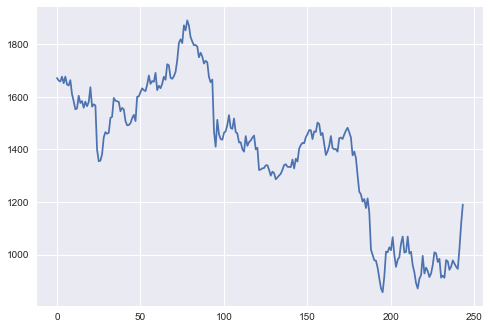

In [213]:
plt.plot(indigo['Close'])
plt.show()

In [111]:
symbols=[]
indigo['Symbol'] = 'INDIGO'
symbols.append(indigo)
indigo = indigo[['Date', 'Close', 'Symbol']]
indigo.head()

,Date,Close,Symbol
0,2019-06-06,1670.849976,INDIGO
1,2019-06-07,1661.199951,INDIGO
2,2019-06-10,1657.500000,INDIGO
3,2019-06-11,1675.900024,INDIGO
4,2019-06-12,1650.949951,INDIGO


In [112]:
df = pd.concat([ril, indigo, airtel])
df = df.reset_index()
df.head()

,index,Date,Close,Symbol
0,0,2019-06-06,1327.349976,RIL
1,1,2019-06-07,1314.900024,RIL
2,2,2019-06-10,1319.150024,RIL
3,3,2019-06-11,1329.150024,RIL
4,4,2019-06-12,1332.150024,RIL


In [113]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.dropna(axis=1, how='any')
df_pivot.head()

Symbol,Date,ARTL,INDIGO,RIL
0,2019-06-06,353.799988,1670.849976,1327.349976
1,2019-06-07,357.100006,1661.199951,1314.900024
2,2019-06-10,363.450012,1657.500000,1319.150024
3,2019-06-11,363.250000,1675.900024,1329.150024
4,2019-06-12,359.899994,1650.949951,1332.150024


In [116]:
df_pivot['INDIGO'] =  df_pivot['INDIGO'].astype(float)
df_pivot['ARTL'] =  df_pivot['ARTL'].astype(float)
df_pivot['RIL'] =  df_pivot['RIL'].astype(float)

In [120]:
corrMatrix = df_pivot.corr()
print (corrMatrix)

Symbol      ARTL    INDIGO       RIL
Symbol                              
ARTL    1.000000 -0.710255  0.422792
INDIGO -0.710255  1.000000 -0.002914
RIL     0.422792 -0.002914  1.000000


In [130]:
airtel_series = df_pivot['ARTL']
ril_series = df_pivot['RIL']
indigo_series = df_pivot['INDIGO']

In [131]:
diff_airtel = airtel_series.diff()
diff_ril = ril_series.diff()
diff_indigo = indigo_series.diff()

In [134]:
diff_ril.corr(diff_indigo)

0.23118286744663372

In [204]:
ril_result = seasonal_decompose(np.asarray(ril_series), freq=3)
airtel_result = seasonal_decompose(np.asarray(airtel_series), freq=3)
indigo_result = seasonal_decompose(np.asarray(indigo_series), freq=3)

In [157]:
ril_trend = result.trend
ril_seasonal = result.seasonal
ril_residual = result.resid

In [225]:
pearsonr(ril_result.trend[1:243], airtel_result.trend[1:243])[0] #RELIANCE AND AIRTEL

0.41782321369453324

In [228]:
pearsonr(ril_result.trend[1:243], airtel_result.trend[1:243])[0]

0.41782321369453324

In [219]:
pearsonr(ril_result.trend[1:243], indigo_result.trend[1:243])[0] #RELIANCE AND INDIGO

-0.0001829111530212444

In [229]:
pearsonr(indigo_result.trend[1:243], airtel_result.trend[1:243])[0] #INDIGO AND AIRTEL

-0.71884634760632415

In [215]:
indigo_trend_resid = indigo_result.resid[1:243] * indigo_result.trend[1:243]
airtel_trend_resid = airtel_result.resid[1:243] * airtel_result.trend[1:243]

In [217]:
pearsonr(indigo_trend_resid, airtel_trend_resid)[0]

0.23028234137260162